<a href="https://colab.research.google.com/github/kwankoravich/capturing_CO2_working_cap_MOFs/blob/main/pycaret_tmlcc_koravich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Install and import libraries

In [ ]:
!pip install pycaret

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py

import warnings
import time
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display='text')

from pycaret.regression import *
from pycaret.utils import version
print('Pycaret Version: ', version())

Pycaret Version:  2.3.4


#2. Data wrangling

In [ ]:
# Download train, pretest มาจาก google drive
# จาก https://drive.google.com/file/d/1C6TgzYAUuJC-dLkfb12kNKTva0jjTu4P/view?usp=sharing
# https://drive.google.com/file/d/1FOzrdgz13923eucw8UVHQ-LbeilrEXY-/view?usp=sharing

###### New train dataset 28-09
# https://drive.google.com/file/d/10TqCJWp1Fz9hdcqbBTcjzUJQrFUUVvoy/view?usp=sharing

#!gdown --id 1FOzrdgz13923eucw8UVHQ-LbeilrEXY-
#!gdown --id 1C6TgzYAUuJC-dLkfb12kNKTva0jjTu4P
#!gdown --id 10TqCJWp1Fz9hdcqbBTcjzUJQrFUUVvoy

In [ ]:
df = pd.read_csv('train_clean_no_outlier_12-10.csv', index_col=['MOFname'])
# df_test = pd.read_csv('pretest.csv')
# df_new = pd.read_csv('complete_train_set_28-09.csv')

In [ ]:
df = df[(df['surface_area [m^2/g]']) != 0 ]
df = df[(df['CO2/N2_selectivity'] <= 300)]
df = df[(df['imp heat_adsorption'] <= 12.5)]

# Clustering

In [ ]:
data = df[['imp heat_adsorption','CO2_working_capacity [mL/g]']]
data

,imp heat_adsorption,CO2_working_capacity [mL/g]
MOFname,,
mof_unit_2,7.147286,101.224774
mof_unit_3,6.347967,118.987011
mof_unit_4,6.190085,187.626004
mof_unit_6,5.398304,55.786959
mof_unit_7,6.303857,111.690462
...,...,...
mof_unit_66520,4.485481,7.602105
mof_unit_66521,3.605688,2.675231
mof_unit_66522,3.361233,-1.686092


In [ ]:
#from pycaret.clustering import *
#exp_name = setup(data = data)

In [ ]:
#kmeans = create_model('kmeans', num_clusters = 2)

In [ ]:
#plot_model(kmeans, plot = 'cluster')

In [ ]:
#df = predict_model(model = dbscan, data = df)

In [ ]:
def class_label(data):
    val = 0
    if data>=20:
        val = '1'
    else:
        val = '0'
    return val
df['Cluster'] = df['CO2_working_capacity [mL/g]'].apply(class_label)

In [ ]:
df

,volume [A^3],weight [u],density [g/cm3],Di-LCD [A],Df-PLD [A],Dif [A],surface_area [m^2/g],void_volume [cm^3/g],calc_void fraction,functional_groups 1,functional_groups 2,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],imp heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,CO2_working_capacity [mL/g],metal_charge_mean,metal_charge_max,num_metal,metal_charge_density,metal_density,Cluster
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_2,2769.503842,2211.697211,1.326058,7.31755,6.28759,7.31755,603.61,0.1040,0.137910,F,OMe,10,44,57,etb,33.616780,7.147286,7.147286,8.463295,17.684225,18.960098,100.063446,91.815775,96.942210,101.224774,1.204092,1.263757,2.0,36.082267,3.51,1
mof_unit_3,1089.818728,773.687960,1.178828,6.73435,4.65130,6.73435,788.50,0.1262,0.148768,OMe,COOH,2,22,24,pcu,19.263726,6.347967,6.347967,10.732110,9.552271,10.631996,89.202223,89.943258,90.387501,118.987011,0.946149,0.951780,2.0,25.299211,8.96,1
mof_unit_4,2205.198301,1304.638720,0.982384,6.32917,5.77752,6.32917,1441.53,0.2220,0.218089,H,SO3H,9,17,24,sra,25.701377,6.190085,6.190085,6.935530,17.504896,19.274980,109.537419,90.234580,90.532988,187.626004,1.411146,1.425207,4.0,112.245145,6.11,1
mof_unit_6,3954.659761,1543.027680,0.647893,12.20304,11.77350,12.20304,2430.55,0.5725,0.370919,Pr,NO2,9,7,23,sra,17.146541,5.398304,5.398304,24.949291,7.054011,22.606019,90.036873,96.274104,89.946334,55.786959,1.193537,1.241825,4.0,119.780375,6.11,1
mof_unit_7,3565.914939,1954.749656,0.910247,12.00479,10.98421,12.00316,1530.02,0.3662,0.333332,NH2,H,10,53,55,etb,18.363791,6.303857,6.303857,8.286700,19.200319,22.787351,100.168180,89.967715,92.229090,111.690462,1.641524,1.643114,2.0,64.386865,3.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_66520,1426.479810,1272.451540,1.481203,6.86894,5.52882,6.86894,1343.62,0.2038,0.301869,Me,I,3,12,21,pcu,5.867674,4.485481,4.485481,10.277785,10.671366,13.626838,93.277966,74.428678,97.667494,7.602105,1.025893,1.025893,2.0,66.518893,7.14,0
mof_unit_66521,23943.701366,5497.752320,0.381270,19.22726,16.68686,18.97525,4182.24,1.7399,0.663372,HCO,Me,1,9,27,pcu,4.060772,3.605688,3.605688,25.892701,43.014841,25.102146,89.999427,121.083481,90.000229,2.675231,0.971793,0.984940,16.0,792.709554,7.14,0
mof_unit_66522,14389.971556,4396.164320,0.507286,12.90542,9.32427,12.90509,4149.64,1.1246,0.570494,OPr,Cl,1,9,20,pcu,4.313411,3.361233,3.361233,26.397988,33.011322,21.131416,89.999962,128.607067,90.000014,-1.686092,1.010950,1.049351,16.0,710.594402,7.14,0


In [ ]:
#df_hard = df[df['Class'] == '1']
#df_hard
#df_hard = df_hard.drop(columns=['Class'])
#df_soft = df[df['Class'] == '0']
#df_soft = df_soft.drop(columns=['Class'])

In [ ]:
drop_col_names = ['functional_groups 1','functional_groups 2','Dif [A]','void_volume [cm^3/g]','metal_linker', 'organic_linker1', 'organic_linker2', 'volume [A^3]', 'weight [u]', 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]']
df.drop(drop_col_names, axis=1, inplace=True)
#df_hard.drop(drop_col_names, axis=1, inplace=True)
#df_soft.drop(drop_col_names, axis=1, inplace=True)

In [ ]:
#df_hard.head(10)

In [ ]:
#df_soft.head(10)

In [ ]:
df

,density [g/cm3],Di-LCD [A],Df-PLD [A],surface_area [m^2/g],calc_void fraction,topology,CO2/N2_selectivity,imp heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,CO2_working_capacity [mL/g],metal_charge_mean,metal_charge_max,num_metal,metal_charge_density,metal_density,Cluster
MOFname,,,,,,,,,,,,,,,,,,,,,
mof_unit_2,1.326058,7.31755,6.28759,603.61,0.137910,etb,33.616780,7.147286,8.463295,17.684225,18.960098,100.063446,91.815775,96.942210,101.224774,1.204092,1.263757,2.0,36.082267,3.51,1
mof_unit_3,1.178828,6.73435,4.65130,788.50,0.148768,pcu,19.263726,6.347967,10.732110,9.552271,10.631996,89.202223,89.943258,90.387501,118.987011,0.946149,0.951780,2.0,25.299211,8.96,1
mof_unit_4,0.982384,6.32917,5.77752,1441.53,0.218089,sra,25.701377,6.190085,6.935530,17.504896,19.274980,109.537419,90.234580,90.532988,187.626004,1.411146,1.425207,4.0,112.245145,6.11,1
mof_unit_6,0.647893,12.20304,11.77350,2430.55,0.370919,sra,17.146541,5.398304,24.949291,7.054011,22.606019,90.036873,96.274104,89.946334,55.786959,1.193537,1.241825,4.0,119.780375,6.11,1
mof_unit_7,0.910247,12.00479,10.98421,1530.02,0.333332,etb,18.363791,6.303857,8.286700,19.200319,22.787351,100.168180,89.967715,92.229090,111.690462,1.641524,1.643114,2.0,64.386865,3.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_66520,1.481203,6.86894,5.52882,1343.62,0.301869,pcu,5.867674,4.485481,10.277785,10.671366,13.626838,93.277966,74.428678,97.667494,7.602105,1.025893,1.025893,2.0,66.518893,7.14,0
mof_unit_66521,0.381270,19.22726,16.68686,4182.24,0.663372,pcu,4.060772,3.605688,25.892701,43.014841,25.102146,89.999427,121.083481,90.000229,2.675231,0.971793,0.984940,16.0,792.709554,7.14,0
mof_unit_66522,0.507286,12.90542,9.32427,4149.64,0.570494,pcu,4.313411,3.361233,26.397988,33.011322,21.131416,89.999962,128.607067,90.000014,-1.686092,1.010950,1.049351,16.0,710.594402,7.14,0


In [ ]:
df.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','topology','CO2_N2_selectivity', 'heat_adsorption','_cell_length_a','_cell_length_b','_cell_length_c','_cell_angle_alpha','_cell_angle_beta','_cell_angle_gamma', 'CO2_working_capacity','metal_charge_mean','metal_charge_max','num_metal','metal_charge_density','metal_density','Cluster']
#df_hard.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','functional_groups 1','functional_groups 2','topology','CO2_N2_selectivity', 'heat_adsorption', 'CO2_working_capacity']
#df_soft.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','functional_groups 1','functional_groups 2','topology','CO2_N2_selectivity', 'heat_adsorption', 'CO2_working_capacity']
df

,density,Di-LCD,Df-PLD,surface_area,void_fraction,topology,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,CO2_working_capacity,metal_charge_mean,metal_charge_max,num_metal,metal_charge_density,metal_density,Cluster
MOFname,,,,,,,,,,,,,,,,,,,,,
mof_unit_2,1.326058,7.31755,6.28759,603.61,0.137910,etb,33.616780,7.147286,8.463295,17.684225,18.960098,100.063446,91.815775,96.942210,101.224774,1.204092,1.263757,2.0,36.082267,3.51,1
mof_unit_3,1.178828,6.73435,4.65130,788.50,0.148768,pcu,19.263726,6.347967,10.732110,9.552271,10.631996,89.202223,89.943258,90.387501,118.987011,0.946149,0.951780,2.0,25.299211,8.96,1
mof_unit_4,0.982384,6.32917,5.77752,1441.53,0.218089,sra,25.701377,6.190085,6.935530,17.504896,19.274980,109.537419,90.234580,90.532988,187.626004,1.411146,1.425207,4.0,112.245145,6.11,1
mof_unit_6,0.647893,12.20304,11.77350,2430.55,0.370919,sra,17.146541,5.398304,24.949291,7.054011,22.606019,90.036873,96.274104,89.946334,55.786959,1.193537,1.241825,4.0,119.780375,6.11,1
mof_unit_7,0.910247,12.00479,10.98421,1530.02,0.333332,etb,18.363791,6.303857,8.286700,19.200319,22.787351,100.168180,89.967715,92.229090,111.690462,1.641524,1.643114,2.0,64.386865,3.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_66520,1.481203,6.86894,5.52882,1343.62,0.301869,pcu,5.867674,4.485481,10.277785,10.671366,13.626838,93.277966,74.428678,97.667494,7.602105,1.025893,1.025893,2.0,66.518893,7.14,0
mof_unit_66521,0.381270,19.22726,16.68686,4182.24,0.663372,pcu,4.060772,3.605688,25.892701,43.014841,25.102146,89.999427,121.083481,90.000229,2.675231,0.971793,0.984940,16.0,792.709554,7.14,0
mof_unit_66522,0.507286,12.90542,9.32427,4149.64,0.570494,pcu,4.313411,3.361233,26.397988,33.011322,21.131416,89.999962,128.607067,90.000014,-1.686092,1.010950,1.049351,16.0,710.594402,7.14,0


In [ ]:
#df = df.drop(df[df['CO2_N2_selectivity'] > 500].index)
#df

In [ ]:
#df_hard.info()

In [ ]:
#df_hard.isna().sum()

In [ ]:
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df['functional_groups'] = df['functional_groups'].fillna('No Group')
#df['heat_adsorption'] = df['heat_adsorption'].fillna(0)
# df= df.fillna(0)

In [ ]:
#df_soft.isna().sum()

In [ ]:
# col_names = ['topology', 'functional_groups']

# # One-Hot Encoding
# dummies_df2 = pd.get_dummies(df2[col_names])

# # Merge One-Hot Encoding
# df2 = pd.concat([df2, dummies_df2], axis=1)

# # Drop unused columns (One-Hot Encoding)
# df2 = df2.drop(col_names, axis=1)
# print (df2)

pretest dataset

In [ ]:
df_test = pd.read_csv('test_set_clean_12-10.csv', index_col='MOFname')
df_test

,volume [A^3],weight [u],density [g/cm3],Di-LCD [A],Df-PLD [A],Dif [A],surface_area [m^2/g],void_volume [cm^3/g],calc_void fraction,functional_groups 1,functional_groups 2,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,metal_charge_mean,metal_charge_max,num_metal,metal_charge_density,metal_density
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_68614,1208.301332,797.70936,1.096247,4.85458,3.79493,4.79015,586.54,0.1039,0.113900,OEt,H,2,5,26,pcu,36.639791,7.005640,7.806778,9.084327,17.070225,89.170193,86.574021,90.255496,0.984890,0.986440,2.0,28.378971,8.96
mof_unit_68615,4126.414623,3733.65779,1.502452,6.79285,5.32349,6.53826,852.49,0.1422,0.213649,H,I,4,6,17,acs,18.390691,5.119399,12.951336,13.273001,27.655520,94.918678,90.193233,119.264951,1.083912,1.121756,6.0,175.778368,7.19
mof_unit_68616,1602.148373,747.21048,0.774425,6.62995,4.73510,6.62995,3155.73,0.4375,0.338811,CN,OH,3,11,17,pcu,13.062850,5.045400,14.948982,10.697065,10.019137,89.936295,90.226349,90.052169,0.971390,0.977673,2.0,52.212574,7.14
mof_unit_68617,2436.629312,995.80232,0.678614,7.55453,5.80773,7.55453,3521.09,0.5963,0.404657,OMe,H,2,1,28,pcu,9.601198,5.106238,10.835044,9.587345,23.461267,89.700303,91.133217,89.959706,1.036728,1.042814,2.0,54.062791,8.96
mof_unit_68618,3123.418006,1337.53800,0.711074,9.90620,7.59386,9.90620,2678.46,0.5479,0.389598,NO2,Pr,3,8,19,pcu,12.974954,5.287639,11.498125,16.343084,16.653784,86.935117,91.621359,90.939612,1.036811,1.052271,2.0,55.706478,7.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_85609,32660.944610,4723.68288,0.240155,18.67734,14.68097,18.66120,5720.14,3.2318,0.776132,OH,NO2,3,3,14,nbo,4.536626,3.146698,44.634366,38.924145,21.601534,89.675598,60.492060,89.867005,0.978672,1.005628,12.0,947.445012,7.14
mof_unit_85610,5070.998617,1499.13262,0.490891,14.82749,9.48698,14.73181,4017.28,1.2058,0.591917,Me,OMe,3,1,11,nbo,6.745508,3.658871,18.653876,18.775583,18.721517,109.201102,109.364607,109.469182,0.957019,0.980273,6.0,240.530469,7.14
mof_unit_85611,4669.804446,1322.04892,0.470097,14.50556,8.17067,14.50528,4288.76,1.1689,0.549497,Me,CN,2,7,23,pcu,4.666206,3.593052,17.736994,16.514905,15.943922,89.977454,90.891096,89.990901,0.963032,0.964235,2.0,80.406944,8.96


In [ ]:
df_test.shape

(17000, 28)

In [ ]:
#df_test_hard = df_test[df_test['Label'] == 1]
#df_test_hard = df_test_hard.drop(columns=['Label'])
#df_test_soft = df_test[df_test['Label'] == 0]
#df_test_soft = df_test_soft.drop(columns=['Label'])

In [ ]:
drop_col_names_test = ['functional_groups 1','functional_groups 2','void_volume [cm^3/g]','Dif [A]','metal_linker', 'organic_linker1', 'organic_linker2', 'volume [A^3]', 'weight [u]']
df_test.drop(drop_col_names_test, axis=1, inplace=True)
#df_test_hard.drop(drop_col_names_test, axis=1, inplace=True)
#df_test_soft.drop(drop_col_names_test, axis=1, inplace=True)

In [ ]:
#df_test_hard

In [ ]:
#df_test_soft

In [ ]:
df_test.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','topology','CO2_N2_selectivity', 'heat_adsorption','_cell_length_a','_cell_length_b','_cell_length_c','_cell_angle_alpha','_cell_angle_beta','_cell_angle_gamma','metal_charge_mean','metal_charge_max','num_metal','metal_charge_density','metal_density']
#df_test_hard.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','functional_groups 1','functional_groups 2','topology','CO2_N2_selectivity', 'heat_adsorption']
#df_test_soft.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','functional_groups 1','functional_groups 2','topology','CO2_N2_selectivity', 'heat_adsorption']

In [ ]:
df_test

,density,Di-LCD,Df-PLD,surface_area,void_fraction,topology,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,metal_charge_mean,metal_charge_max,num_metal,metal_charge_density,metal_density
MOFname,,,,,,,,,,,,,,,,,,,
mof_unit_68614,1.096247,4.85458,3.79493,586.54,0.113900,pcu,36.639791,7.005640,7.806778,9.084327,17.070225,89.170193,86.574021,90.255496,0.984890,0.986440,2.0,28.378971,8.96
mof_unit_68615,1.502452,6.79285,5.32349,852.49,0.213649,acs,18.390691,5.119399,12.951336,13.273001,27.655520,94.918678,90.193233,119.264951,1.083912,1.121756,6.0,175.778368,7.19
mof_unit_68616,0.774425,6.62995,4.73510,3155.73,0.338811,pcu,13.062850,5.045400,14.948982,10.697065,10.019137,89.936295,90.226349,90.052169,0.971390,0.977673,2.0,52.212574,7.14
mof_unit_68617,0.678614,7.55453,5.80773,3521.09,0.404657,pcu,9.601198,5.106238,10.835044,9.587345,23.461267,89.700303,91.133217,89.959706,1.036728,1.042814,2.0,54.062791,8.96
mof_unit_68618,0.711074,9.90620,7.59386,2678.46,0.389598,pcu,12.974954,5.287639,11.498125,16.343084,16.653784,86.935117,91.621359,90.939612,1.036811,1.052271,2.0,55.706478,7.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_85609,0.240155,18.67734,14.68097,5720.14,0.776132,nbo,4.536626,3.146698,44.634366,38.924145,21.601534,89.675598,60.492060,89.867005,0.978672,1.005628,12.0,947.445012,7.14
mof_unit_85610,0.490891,14.82749,9.48698,4017.28,0.591917,nbo,6.745508,3.658871,18.653876,18.775583,18.721517,109.201102,109.364607,109.469182,0.957019,0.980273,6.0,240.530469,7.14
mof_unit_85611,0.470097,14.50556,8.17067,4288.76,0.549497,pcu,4.666206,3.593052,17.736994,16.514905,15.943922,89.977454,90.891096,89.990901,0.963032,0.964235,2.0,80.406944,8.96


In [ ]:
#df_test_hard

In [ ]:
#df_test_soft

#3. initialize setup pycaret

In [ ]:
from pycaret.regression import *
# from sklearn.impute import SimpleImputer

reg_hard = setup(data = df, 
             target = 'CO2_working_capacity',
             session_id = 999,
             numeric_features = ['num_metal'],
             ignore_features = ['Cluster','metal_charge_mean','num_metal'], 
             train_size = 0.9,
             normalize = True,
             normalize_method = 'robust',
             create_clusters = False,
             use_gpu = True,
             log_experiment = False,
             n_jobs = -1,
             polynomial_features = False,
             trigonometry_features = True,
             feature_selection = True,
             pca = False,
             remove_multicollinearity = False,
             data_split_stratify = ['Cluster'],
             remove_outliers= True)

# pca = True
# transformation = True
# transformation_method = 'yeo-johnson'
# transformation_method = 'quantile'
# numeric_features
# normalize_method = 'robust','minmax','maxabs'
# imputation_type='iterative'
# log_experiment = True
#high_cardinality_features = ['topology'],
#high_cardinality_method = 'clustering',
#feature_interaction = True, 
#feature_ratio = True,

,Description,Value
0,session_id,999
1,Target,CO2_working_capacity
2,Original Data,"(56731, 21)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(48504, 21)"


#4. Run models

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
#top3 = compare_models(n_select=3, sort='MAE')

In [ ]:
#pull().sort_values(by='MAE', ascending=True)

In [ ]:
# calculate log10

import math
math.log(22.9911)

3.1351071845204164

In [ ]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19.2451,771.6139,27.7779,0.8875,0.3031,0.3086
1,19.4336,801.2956,28.3072,0.8862,0.3053,0.6131
2,19.3288,776.0706,27.8580,0.8873,0.3034,0.3460
3,19.1429,764.9878,27.6584,0.8859,0.3028,0.2762
4,19.8953,816.2388,28.5699,0.8809,0.3119,0.4165
5,18.7675,729.7555,27.0140,0.8935,0.3204,0.3798
6,19.0834,758.1906,27.5353,0.8908,0.3048,0.4080
7,19.1222,742.5472,27.2497,0.8940,0.3175,0.5170
8,19.2317,785.7177,28.0307,0.8890,0.3187,0.3253
9,19.1795,757.7647,27.5275,0.8890,0.3058,0.2753


In [ ]:
#mlp = create_model('mlp')

In [ ]:
#save_model(mlp, 'mlp_saved_02102021')

#5. Tune models

In [ ]:
# We can tune our top 3 models dynamically with a higher iteration rate (n_iter) to find more optimal hyper parameters over a larger search space. 
#tuned_top3 = [tune_model(i, n_iter=10, optimize='MAE', fold=5) for i in top3]

In [ ]:
#mlp = load_model('mlp_saved_30092021')

In [ ]:
tuned_lgbm = tune_model(lgbm, optimize='MAE', n_iter= 50, early_stopping = True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18.4820,706.7544,26.5849,0.8970,0.2857,0.3079
1,18.5684,731.2910,27.0424,0.8961,0.2736,1.0035
2,18.7251,731.9525,27.0546,0.8937,0.2886,0.3385
3,18.4324,716.3829,26.7653,0.8932,0.2804,0.2660
4,19.1223,755.1771,27.4805,0.8899,0.2832,0.3952
5,17.9319,668.2466,25.8505,0.9025,0.2906,0.3957
6,18.4137,707.8601,26.6056,0.8980,0.2876,0.4237
7,18.4235,698.3713,26.4267,0.9003,0.2965,0.5529
8,18.5693,731.9379,27.0544,0.8966,0.3001,0.3493
9,18.3110,697.0268,26.4013,0.8979,0.2916,0.2900


In [ ]:
#tuned_mlp = tune_model(mlp, optimize='MAE', n_iter= 50, early_stopping = True, choose_better = True)

In [ ]:
#tuned_rf = tune_model(run, optimize='MAE')

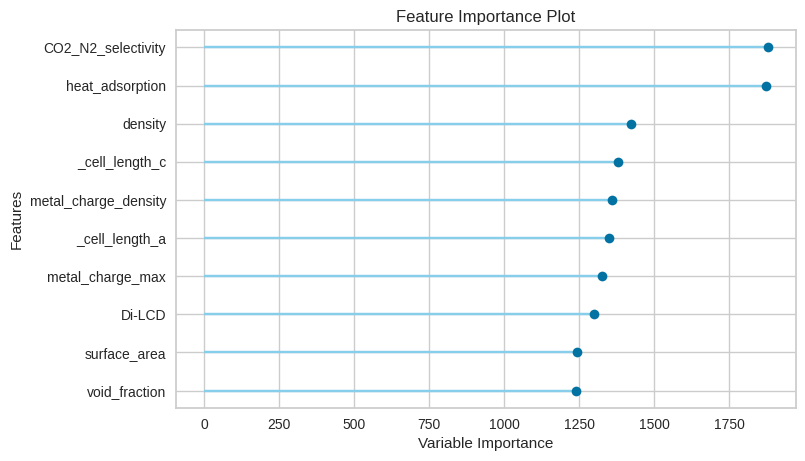

In [ ]:
plot_model(tuned_lgbm, plot='feature')

In [ ]:
!pip install shap

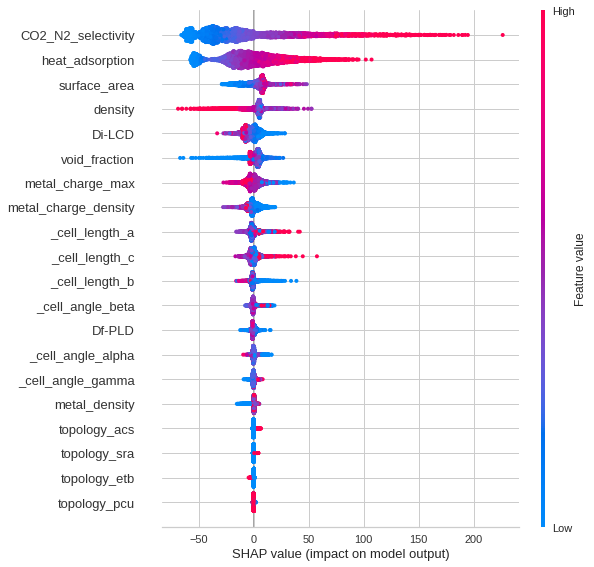

In [ ]:
interpret_model(tuned_lgbm)

In [ ]:
final_lgbm = finalize_model(tuned_lgbm)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 

In [ ]:
predictions = predict_model(tuned_lgbm, data = df_test)
predictions

,density,Di-LCD,Df-PLD,surface_area,void_fraction,topology,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,metal_charge_mean,metal_charge_max,num_metal,metal_charge_density,metal_density,Label
MOFname,,,,,,,,,,,,,,,,,,,,
mof_unit_68614,1.096247,4.85458,3.79493,586.54,0.113900,pcu,36.639791,7.005640,7.806778,9.084327,17.070225,89.170193,86.574021,90.255496,0.984890,0.986440,2.0,28.378971,8.96,187.737717
mof_unit_68615,1.502452,6.79285,5.32349,852.49,0.213649,acs,18.390691,5.119399,12.951336,13.273001,27.655520,94.918678,90.193233,119.264951,1.083912,1.121756,6.0,175.778368,7.19,50.228254
mof_unit_68616,0.774425,6.62995,4.73510,3155.73,0.338811,pcu,13.062850,5.045400,14.948982,10.697065,10.019137,89.936295,90.226349,90.052169,0.971390,0.977673,2.0,52.212574,7.14,71.050220
mof_unit_68617,0.678614,7.55453,5.80773,3521.09,0.404657,pcu,9.601198,5.106238,10.835044,9.587345,23.461267,89.700303,91.133217,89.959706,1.036728,1.042814,2.0,54.062791,8.96,62.091431
mof_unit_68618,0.711074,9.90620,7.59386,2678.46,0.389598,pcu,12.974954,5.287639,11.498125,16.343084,16.653784,86.935117,91.621359,90.939612,1.036811,1.052271,2.0,55.706478,7.14,65.732966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_85609,0.240155,18.67734,14.68097,5720.14,0.776132,nbo,4.536626,3.146698,44.634366,38.924145,21.601534,89.675598,60.492060,89.867005,0.978672,1.005628,12.0,947.445012,7.14,-4.248490
mof_unit_85610,0.490891,14.82749,9.48698,4017.28,0.591917,nbo,6.745508,3.658871,18.653876,18.775583,18.721517,109.201102,109.364607,109.469182,0.957019,0.980273,6.0,240.530469,7.14,1.320061
mof_unit_85611,0.470097,14.50556,8.17067,4288.76,0.549497,pcu,4.666206,3.593052,17.736994,16.514905,15.943922,89.977454,90.891096,89.990901,0.963032,0.964235,2.0,80.406944,8.96,0.699018


In [ ]:
#lr = create_model('lightgbm')
#lr_final = finalize_model(lr)
#pred_hard = predict_model(lgbm, data = df_test_hard)
#pred_hard

In [ ]:
#from pycaret.regression import *
# from sklearn.impute import SimpleImputer

#reg_soft = setup(data = df_soft, 
             #target = 'CO2_working_capacity',
             #session_id = 999,
             #ignore_features = [], 
             #train_size = 0.8,
             #normalize = True,
             #use_gpu = True,
             #log_experiment = False,
             #n_jobs = None,
             #remove_multicollinearity = False,
             #remove_outliers= True)

In [ ]:
#lgbm = create_model('lightgbm')

In [ ]:
#tuned_lgbm = tune_model(lgbm, optimize='MAE')

In [ ]:
#lr = create_model('lightgbm')
#lr_final = finalize_model(lr)
#pred_soft = predict_model(lgbm, data = df_test_soft)
#pred_soft

In [ ]:
#predictions = pd.concat([pred_hard, pred_soft])
#predictions = predictions.sort_index() # incomplete
#predictions

# Submission

In [ ]:
df_sub = predictions
df_sub

,density,Di-LCD,Df-PLD,surface_area,void_fraction,topology,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,metal_charge_mean,metal_charge_max,num_metal,metal_charge_density,metal_density,Label
MOFname,,,,,,,,,,,,,,,,,,,,
mof_unit_68614,1.096247,4.85458,3.79493,586.54,0.113900,pcu,36.639791,7.005640,7.806778,9.084327,17.070225,89.170193,86.574021,90.255496,0.984890,0.986440,2.0,28.378971,8.96,187.737717
mof_unit_68615,1.502452,6.79285,5.32349,852.49,0.213649,acs,18.390691,5.119399,12.951336,13.273001,27.655520,94.918678,90.193233,119.264951,1.083912,1.121756,6.0,175.778368,7.19,50.228254
mof_unit_68616,0.774425,6.62995,4.73510,3155.73,0.338811,pcu,13.062850,5.045400,14.948982,10.697065,10.019137,89.936295,90.226349,90.052169,0.971390,0.977673,2.0,52.212574,7.14,71.050220
mof_unit_68617,0.678614,7.55453,5.80773,3521.09,0.404657,pcu,9.601198,5.106238,10.835044,9.587345,23.461267,89.700303,91.133217,89.959706,1.036728,1.042814,2.0,54.062791,8.96,62.091431
mof_unit_68618,0.711074,9.90620,7.59386,2678.46,0.389598,pcu,12.974954,5.287639,11.498125,16.343084,16.653784,86.935117,91.621359,90.939612,1.036811,1.052271,2.0,55.706478,7.14,65.732966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_85609,0.240155,18.67734,14.68097,5720.14,0.776132,nbo,4.536626,3.146698,44.634366,38.924145,21.601534,89.675598,60.492060,89.867005,0.978672,1.005628,12.0,947.445012,7.14,-4.248490
mof_unit_85610,0.490891,14.82749,9.48698,4017.28,0.591917,nbo,6.745508,3.658871,18.653876,18.775583,18.721517,109.201102,109.364607,109.469182,0.957019,0.980273,6.0,240.530469,7.14,1.320061
mof_unit_85611,0.470097,14.50556,8.17067,4288.76,0.549497,pcu,4.666206,3.593052,17.736994,16.514905,15.943922,89.977454,90.891096,89.990901,0.963032,0.964235,2.0,80.406944,8.96,0.699018


In [ ]:
df_sub['id'] = [i+68614 for i in range(df_sub.shape[0])]

In [ ]:
df_sub_final = df_sub[['id','Label']]
df_sub_final = df_sub_final.rename(columns={"Label": "CO2_working_capacity [mL/g]"})
df_sub_final

,id,CO2_working_capacity [mL/g]
MOFname,,
mof_unit_68614,68614,187.737717
mof_unit_68615,68615,50.228254
mof_unit_68616,68616,71.050220
mof_unit_68617,68617,62.091431
mof_unit_68618,68618,65.732966
...,...,...
mof_unit_85609,85609,-4.248490
mof_unit_85610,85610,1.320061
mof_unit_85611,85611,0.699018


In [ ]:
df_sub_final.to_csv('submission.csv', index=False)